# Purpose
Demonstrate how programming using Python and dataframes can simplify (and speed up) many data operations commonly performed in spreadsheets.

Dataframes are a special data format commonly used in Python for manipulating tabular or spreadsheet-like data. They support a number of operations including:

1. Reshaping the data.

2. Merging two datasets on a common column or set of columns.

3. Grouping data and computing a statistic on the group.

Dataframes are available using a library in Python called Pandas. In the code, Pandas is abbreviated as pd.

# Exercise

Three cohorts of gerbils have been exposed to noise. Each cohort received a different exposure level (104, 110 or 114 dB SPL). In this exercise, we will calculate and plot the mean threshold shift (for each exposure level) 1 and 14 days following the exposure.

To assess threshold shift, we measured ABR thresholds in each animal at three points: several days before noise-exposure (pre-exposure baseline), one day after noise exposure and two weeks after noise exposure.

# Data format

The data has been saved to two Excel spreadsheets.

The first spreadsheet lists ABR thresholds at multiple frequencies from both ears of a number of animals. Missing values are indicated by blank cells. Note how the data is organized. The first two columns indicate the animal identifier and date of the measure. The first two rows indicate the ear and test frequency.

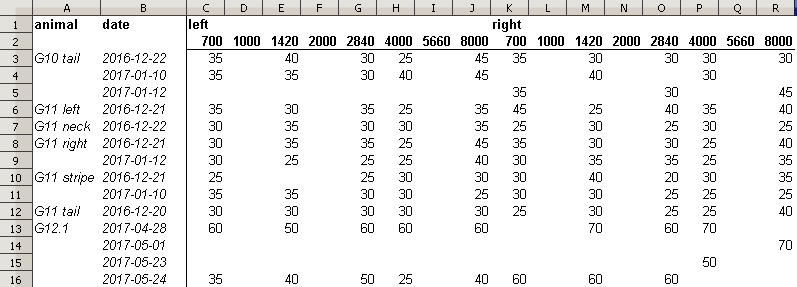

The second spreadsheet contains information on the noise exposure performed on each animal (i.e., the date of exposure and exposure level).

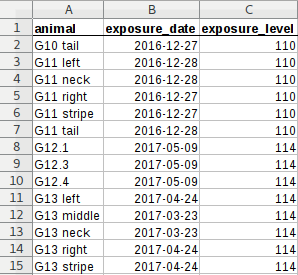

# The analysis

## Setting up the code

At the beginning of every Python script we need to import all the libraries we need and define a few variables.

In [1]:
# This ensures that plots are shown below each code cell
%matplotlib inline

# Import some libraries we need
import pandas as pd
import pylab as pl
import datetime as dt

# For brevity, limit the number of rows displayed
pd.options.display.max_rows = 7

## Read in the data

Since Pandas provides a function for reading multiple file formats, including Excel, reading in the exposure data is very simple.

In [2]:
exposure_data = pd.read_excel('exposure_data.xlsx', index_col=0, header=0)
exposure_data

,exposure_date,exposure_level
animal,,
G10 tail,2016-12-27,110
G11 left,2016-12-28,110
G11 neck,2016-12-28,110
...,...,...
G6 center,2015-09-28,110
G6 neck,2015-09-29,110
G6 tail,2015-09-28,110


Reading the ABR data is a bit more complex because two columns and two rows are used to label the data. We need to tell Pandas that the first two rows and first two columns contain labels and what these labels indicate.



In [4]:
abr_data = pd.read_excel('abr_thresholds.xlsx', header=[0, 1], index_col=[0, 1])
abr_data.index.names = ['animal', 'date']
abr_data.columns.names = ['ear', 'frequency']
abr_data

ear                  left                                        right       \
frequency            700  1000  1420 2000  2840  4000 5660  8000  700  1000   
animal   date                                                                 
G10 tail 2016-12-22  35.0  NaN  40.0  NaN  30.0  25.0  NaN  45.0  35.0  NaN   
         2017-01-10  35.0  NaN  35.0  NaN  30.0  40.0  NaN  45.0   NaN  NaN   
         2017-01-12   NaN  NaN   NaN  NaN   NaN   NaN  NaN   NaN  35.0  NaN   
...                   ...  ...   ...  ...   ...   ...  ...   ...   ...  ...   
G6 tail  2015-09-25  35.0  NaN  40.0  NaN  35.0  35.0  NaN  40.0  30.0  NaN   
         2015-09-29  50.0  NaN  55.0  NaN  55.0  45.0  NaN  40.0   NaN  NaN   
         2015-10-13  35.0  NaN  35.0  NaN  40.0  40.0  NaN  35.0   NaN  NaN   

ear                                                    
frequency            1420 2000  2840  4000 5660  8000  
animal   date                                          
G10 tail 2016-12-22  30.0  NaN  30.0  30.0  NaN  30.0  
         2017-01-10  40.0  NaN   NaN  30.0  NaN   NaN  
         2017-01-12   NaN  NaN  30.0   NaN  NaN  45.0  
...                   ...  ...   ...   ...  ...   ...  
G6 tail  2015-09-25  45.0  NaN  40.0  35.0  NaN  40.0  
         2015-09-29   NaN  NaN   NaN   NaN  NaN   NaN  
         2015-10-13   NaN  NaN   NaN   NaN  NaN   NaN  

[106 rows x 16 columns]

In the table above, the **bold** values indicate the row and column labels. Note that there is a value called NaN in some of the cells. **NaN** is a special value in Python that means "not a number". This value is commonly used to indicate missing data in dataframes. **None** is another value that is commonly used to indicate missing data.

## Merging the dataframes

Now, we need to merge the two dataframes. Right now the ABR dataframe is currently in **wide format**. That means that each row contains multiple ABR thresholds (e.g., one column for each ear and frequency). 

However, in preparation for merging we need to reshape the ABR dataframe so that each row contains only one ABR threshold. This is known as **long format**. We can do this by **stacking** the columns.

In [5]:
data = abr_data.stack().stack()
data.name = 'threshold'
data = data.reset_index()
data

,animal,date,frequency,ear,threshold
0,G10 tail,2016-12-22,700,left,35.0
1,G10 tail,2016-12-22,700,right,35.0
2,G10 tail,2016-12-22,1420,left,40.0
...,...,...,...,...,...
701,G6 tail,2015-10-13,2840,left,40.0
702,G6 tail,2015-10-13,4000,left,40.0
703,G6 tail,2015-10-13,8000,left,35.0


Now that we've reshaped the ABR data, we can merge it with the exposure data. We have to indicate the column that is used to merge the data (animal). This gives us a new dataframe with two new columns indicating the exposure date and exposure level for each row.

In [6]:
merged_data = data.join(exposure_data, on=['animal'])
merged_data

,animal,date,frequency,ear,threshold,exposure_date,exposure_level
0,G10 tail,2016-12-22,700,left,35.0,2016-12-27,110
1,G10 tail,2016-12-22,700,right,35.0,2016-12-27,110
2,G10 tail,2016-12-22,1420,left,40.0,2016-12-27,110
...,...,...,...,...,...,...,...
701,G6 tail,2015-10-13,2840,left,40.0,2015-09-28,110
702,G6 tail,2015-10-13,4000,left,40.0,2015-09-28,110
703,G6 tail,2015-10-13,8000,left,35.0,2015-09-28,110


## Calculating ABR threshold shift

The next step is to compute when the ABR threshold was measured relative to the exposure. We can do this by subtracting the date of the ABR from the exposure date and saving it as a new column, `days_re_exposure`.

In [7]:
merged_data['days_re_exposure'] = merged_data['date'] - merged_data['exposure_date']
merged_data

,animal,date,frequency,ear,threshold,exposure_date,exposure_level,days_re_exposure
0,G10 tail,2016-12-22,700,left,35.0,2016-12-27,110,-5 days
1,G10 tail,2016-12-22,700,right,35.0,2016-12-27,110,-5 days
2,G10 tail,2016-12-22,1420,left,40.0,2016-12-27,110,-5 days
...,...,...,...,...,...,...,...,...
701,G6 tail,2015-10-13,2840,left,40.0,2015-09-28,110,15 days
702,G6 tail,2015-10-13,4000,left,40.0,2015-09-28,110,15 days
703,G6 tail,2015-10-13,8000,left,35.0,2015-09-28,110,15 days


Note that for the pre-exposure baseline, the value is always negative (e.g., -3 days, -7 days, etc.). For the 1 day post-exposure, it is always 1 day. For the two week post-exposure measure, it is at least 14 days.

We'd like to reclassify the days relative to exposure so that we have only three categories (baseline, 1d and 14d). The categories will be stored in a new column, `measure`. First, we create the column and assign a default value of None. For all rows where `days_re_exposure` is negative, we set the value of `measure` to baseline. Where `days_re_baseline` is equal to 1, we assign the value of `measure` to '1d'. Where `days_re_baseline` is greater than or equal to 14, we assign a value of '14d'.


In [8]:
merged_data['measure'] = None

mask = merged_data['days_re_exposure'] < dt.timedelta(days=0)
merged_data.loc[mask, 'measure'] = 'baseline'

mask = merged_data['days_re_exposure'] == dt.timedelta(days=1)
merged_data.loc[mask, 'measure'] = '1d'

mask = merged_data['days_re_exposure'] >= dt.timedelta(days=14)
merged_data.loc[mask, 'measure'] = '14d'

merged_data

,animal,date,frequency,ear,threshold,exposure_date,exposure_level,days_re_exposure,measure
0,G10 tail,2016-12-22,700,left,35.0,2016-12-27,110,-5 days,baseline
1,G10 tail,2016-12-22,700,right,35.0,2016-12-27,110,-5 days,baseline
2,G10 tail,2016-12-22,1420,left,40.0,2016-12-27,110,-5 days,baseline
...,...,...,...,...,...,...,...,...,...
701,G6 tail,2015-10-13,2840,left,40.0,2015-09-28,110,15 days,14d
702,G6 tail,2015-10-13,4000,left,40.0,2015-09-28,110,15 days,14d
703,G6 tail,2015-10-13,8000,left,35.0,2015-09-28,110,15 days,14d


Now that we have categorized our ABR thresholds based on three key timepoints relative to noise exposure, we can calculate the threshold shift. For each exposure level, animal, ear and frequency, we need to identify the matching set of three measures for that ear (baseline, 1d and 14d). To do this, we need to reshape the dataframe again such that each row represents a unique ear and frequency and the three columns are the measures for that ear and frequency.


In [9]:
thresholds = merged_data.set_index(['exposure_level', 'animal', 'ear', 'frequency', 'measure'])['threshold'].unstack()
thresholds[['baseline', '1d', '14d']]

measure                                  baseline    1d   14d
exposure_level animal   ear   frequency                      
104            G2 left  left  700            30.0   NaN   NaN
                              1420           35.0  35.0  35.0
                              2840           30.0   NaN   NaN
...                                           ...   ...   ...
114            G13 tail right 2840           25.0  35.0  25.0
                              4000           25.0  30.0  25.0
                              8000           45.0  45.0  35.0

[326 rows x 3 columns]

Now we can easily compute the threshold shifts for each ear and frequency by subtracting the baseline column from the 1d and 14d columns.

In [10]:
thresholds['1d shift'] = thresholds['1d'] - thresholds['baseline']
thresholds['14d shift'] = thresholds['14d'] - thresholds['baseline']
thresholds[['1d shift', '14d shift']]

measure                                  1d shift  14d shift
exposure_level animal   ear   frequency                     
104            G2 left  left  700             NaN        NaN
                              1420            0.0        0.0
                              2840            NaN        NaN
...                                           ...        ...
114            G13 tail right 2840           10.0        0.0
                              4000            5.0        0.0
                              8000            0.0      -10.0

[326 rows x 2 columns]

Note the missing data. That's because I didn't have a chance to perform some measures (e.g., at one point, I decided to drop certain frequencies due to time). Let's drop those rows so we're only analyzing data for which we have threshold shifts at both one day and 14 days post-exposure.

In [11]:
threshold_shifts = thresholds[['1d shift', '14d shift']].dropna()
threshold_shifts

measure                                  1d shift  14d shift
exposure_level animal   ear   frequency                     
104            G2 left  left  1420            0.0        0.0
                              4000           30.0        0.0
                        right 1420           15.0       15.0
...                                           ...        ...
114            G13 tail right 2840           10.0        0.0
                              4000            5.0        0.0
                              8000            0.0      -10.0

[134 rows x 2 columns]

Now, we want to compute the mean and standard error of the threshold shift across all ears for each exposure level and ABR frequency. To do this, we group by exposure level and frequency and compute the mean and standard error on each column (1d shift and 14d shift) in the group.

In [12]:
mean_shift = threshold_shifts.groupby(level=['exposure_level', 'frequency']).agg(['mean', 'sem'])
mean_shift

1d shift           14d shift          
                               mean       sem      mean       sem
exposure_level frequency                                         
104            1420       20.000000  4.472136  7.500000  2.140872
               4000       23.333333  4.409586 -0.833333  3.004626
110            700        21.250000  3.238992  6.875000  2.824874
...                             ...       ...       ...       ...
114            2840       21.666667  4.051437  1.250000  3.595294
               4000       20.000000  3.162278  5.454545  3.049184
               8000        6.111111  2.735794 -6.111111  2.605787

[12 rows x 4 columns]

Let's plot this information.

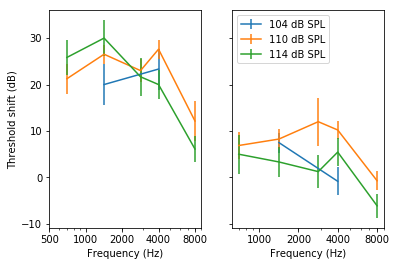

In [13]:
f, (ax_1d, ax_14d) = pl.subplots(1, 2, sharex=True, sharey=True)

for exposure_level, exposure_data in mean_shift.groupby(level='exposure_level'):
    label = '{} dB SPL'.format(exposure_level)
    shift_1d = exposure_data['1d shift'].reset_index()
    ax_1d.errorbar(shift_1d['frequency'], shift_1d['mean'], yerr=shift_1d['sem'], label=label)
    shift_14d = exposure_data['14d shift'].reset_index()
    ax_14d.errorbar(shift_14d['frequency'], shift_14d['mean'], yerr=shift_14d['sem'], label=label)
    
ax_14d.set_xscale('log')
ax_14d.legend(loc='upper left')

ax_1d.set_ylabel('Threshold shift (dB)')
ax_1d.set_xlabel('Frequency (Hz)')
ax_14d.set_xlabel('Frequency (Hz)')

tick_frequencies = [500, 1000, 2000, 4000, 8000]
ax_1d.xaxis.set_ticks(tick_frequencies)
ax_1d.xaxis.set_ticklabels(tick_frequencies);
